The two following lines stand for automatic reload of Jupyter when modification are done on this page. 

In [1]:
%reload_ext autoreload
%autoreload 2

The following lines stand for library tools. If a plot is does not displayed correctly then not add the line "%matplotlib inline". To display the help of very useful commends, type "%magic".

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import os

# 1) Compute the SNR of a star with the Exposure Time Calculator (ETC)



We want to calculate the Signal to Noise Ratio (SNR) for the following star:
    
    Magnitude: 16
    Photometric system: AB

The telescope is :

    Site: San Perdo Martir
    Telescope: COLIBRI
    Optics: COLIBRI Near Infrared arm. filter J
    Camera: CAGIRE 
    Exposure: 7s (=5*1.4s)

Write the hjson configuration file [Make_one_image_etc.hjson](../ImSimpy/configFiles/Make_one_image_etc.hjson) in the folder ImSimpy/configFiles that contains all the input parameters of the computation of the SNR.

First import the package

In [3]:
from pyETC.pyETC import etc

Load the hjson configuration file. If no configfile is given, it will load the default one "default.hjson". os.getenv get the environment variable define by the key ImSimpy_DIR to select the path according to the location of gft-sim.

In [4]:
colibri_etc=etc(configFile=os.getenv('ImSimpy_DIR')+'/ImSimpy/configFiles/Make_one_image_etc.hjson',name_telescope='colibri')


Information about Passband:
----------------------------
Cut_on: 11696 angstroms
Effective wavelength: 12509 angstroms
Cut_off: 13304 angstroms

Airmass: 1.50

Seeing: 1.06

MEAN EFFICENCIES:
------------------
Obscuration: 0.801
Telescope: 0.693 (+obs: 0.555)
Instrument: 0.469
Optics (tel+inst): 0.325  (+obs: 0.260)
Filter: 0.850
Atmosphere: 0.932
Camera: 0.690
System: 0.325 (+obs: 0.260)

Zeropoint: 23.39 (AB mag)


A magnitude (AB system) of 16.00 in J band within a total exposure time of 7.00 seconds splited in 1 exposure(s), implies a total SNR of :

	 - Integrated SNR over 2 pixels: 51.89


A magnitude (AB system) of 16.00 in J band within a total exposure time of 7.00 seconds splited in 1 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 49.15 



Full well capacity of 1 pixel: 80000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 1 exposure(s) of 7.00 sec 
	by:
	- Object:            34

<IPython.core.display.Javascript object>


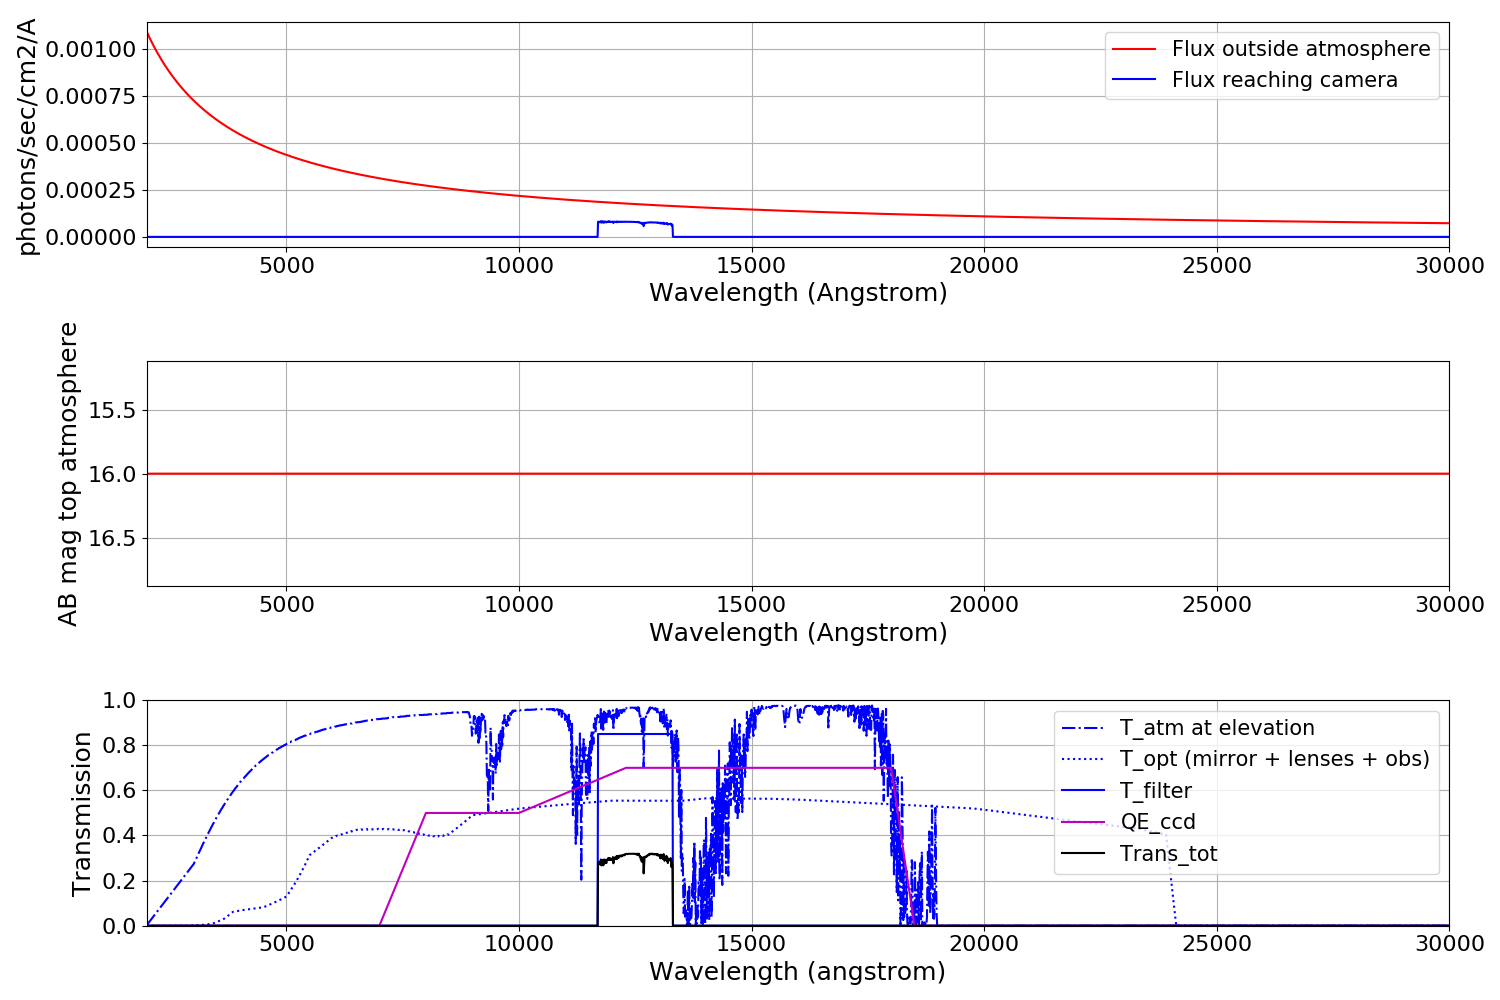

In [5]:
colibri_etc.sim()

The following file [info.txt](../../gft_etc/gft_etc/results/info.txt) in the folder gft-sim/gft_etc/gft_etc/results 
contains very detailed results. 

To retreive only the integrated SNR calculated:

In [6]:
colibri_etc.information['SNR']

51.88963753053174

To retreive all results calculated:

In [7]:
colibri_etc.information

OrderedDict([('sky_site', 'OAN_Ratir_X1.5'),
             ('atmosphere_type', 'file'),
             ('ext_file', 'OAN_extinction'),
             ('atm_file', 'OAN_atm_trans'),
             ('D_M1', 1.3),
             ('D_M2', 0.58),
             ('M2_factor', 1),
             ('focal_length',
              OrderedDict([('DDRAGO-B', 8.124),
                           ('DDRAGO-R', 8.124),
                           ('CAGIRE', 4.874)])),
             ('Fwhm_psf_opt',
              OrderedDict([('g', 0.26),
                           ('r', 0.26),
                           ('i', 0.37),
                           ('z', 0.37),
                           ('y', 0.37),
                           ('J', 0.59),
                           ('H', 0.73),
                           ('gri', 0.3),
                           ('zy', 0.37),
                           ('V', 0.26),
                           ('R', 0.37)])),
             ('detailed_trans', 1),
             ('filter_folder', 'COLIBRI'),
       

# 2) Simulate one image for COLIBRI

## 2.1) Generate maps for instrumental effects (offset, gain map, hot pixels,...)

In [8]:
# Name of output_dir. Will be used for creating folder in catalog/, images/, etc...
output_dir='Make_one_image'

In [9]:
from ImSimpy.utils.generateCalib import Offset, Vignetting, GainMap

Offset(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/Offset/%s/Offset_vis.fits' % output_dir,
     xsize=4096, ysize=4096, floor=1000)
Offset(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/Offset/%s/Offset_nir.fits' % output_dir,
     xsize=2048, ysize=2048, floor=500)

Vignetting(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/Vignetting/%s/Vignetting_vis.fits' % output_dir,
     floor=1,xsize=4096, ysize=4096)
Vignetting(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/Vignetting/%s/Vignetting_nir.fits' % output_dir,
     floor=1,xsize=2048, ysize=2048)

GainMap(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/GainMap/%s/Gain_vis.fits' % output_dir,
        Type='constant',mean=1.5,xsize=4096,ysize=4096)
GainMap(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/GainMap/%s/Gain_nir.fits' % output_dir,
        Type='random',mean=1.3, std=0.1,Nampl=32,xsize=2048,ysize=2048)


In [10]:
from ImSimpy.utils.generateCosmetics import HotPixs, DeadPixs

HotPixs(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/Cosmetics/%s/HotPixs_nir.fits' % output_dir,
        xsize=2048,ysize=2048,Type='random',hotpixels=500,hotmin=5000,hotmax=40000)
HotPixs(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/Cosmetics/%s/HotPixs_vis.fits' % output_dir,
        xsize=4096,ysize=4096,Type='random',hotpixels=500,hotmin=70000,hotmax=300000)

DeadPixs(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/Cosmetics/%s/DeadPixs_nir.fits' % output_dir,
         xsize=2048,ysize=2048,Type='random',deadpixels=500)
DeadPixs(filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/data/Cosmetics/%s/DeadPixs_vis.fits' % output_dir,
         xsize=4096,ysize=4096,Type='random',deadpixels=2000)

## 2.2) Generate raw image

Write the hjson configuration file [Make_one_image_is.hjson](../../gft_is/gft_is/configFiles/Make_one_image_is.hjson) in the folder ImSimpy/configFiles that contains all the input parameters of the computation of the image.

First import the package

In [11]:
from ImSimpy.ImSimpy import ImageSimulator

In [12]:
colibri_IS=ImageSimulator(configFile=os.getenv('ImSimpy_DIR')+'/ImSimpy/configFiles/Make_one_image_is.hjson',
                          name_telescope='colibri')

Setting the random number generator seed: current time


In [13]:
colibri_IS.simulate()

Read config file and execute ETC
Building image: Make_one_image/image_J.fits:
	GENERATE OBJECTS CATALOG


	GENERATE PSF
PSF convolution
done
	ADD OBJECTS
Total number of objects in the input catalog = 16237
15366/16237 objects were placed on the detector
	Apply Shot noise
	Add dark current
	Add Sky background
	Add Vignetting
	Add cosmetics
	Add Readout Noise
	Add Digitisation Noise
	electrons2adu
	Add offset
	Discretise
	Write outputs


To retreive the image name simulated:

In [14]:
fits_filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/images/'+colibri_IS.information['output']
print (fits_filename)

/home/dcorre/code/ImSimpy/ImSimpy/images/Make_one_image/image_J.fits


To display the calculated image:

In [15]:
from astropy.io import fits
import numpy as np

<IPython.core.display.Javascript object>


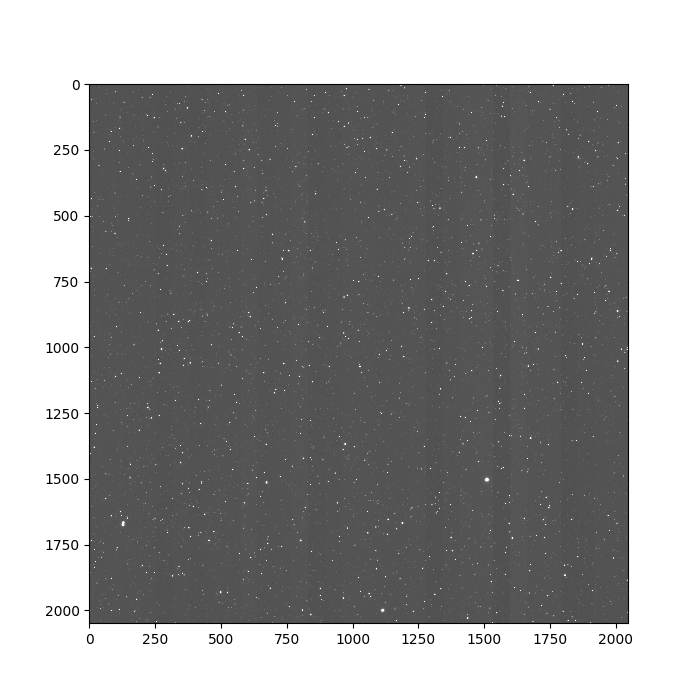

In [16]:
fits_file = fits.getdata(fits_filename)
image_mean = np.mean(fits_file)
image_std = np.std(fits_file)
vmin = image_mean - 5*image_std
vmax = image_mean + 10*image_std
plt.figure(figsize=(7,7))
plt.imshow(fits_file,interpolation='none',cmap='gray',vmin=vmin,vmax=vmax)

Add wcs coordinates

In [17]:
from astropy.wcs import WCS

<IPython.core.display.Javascript object>


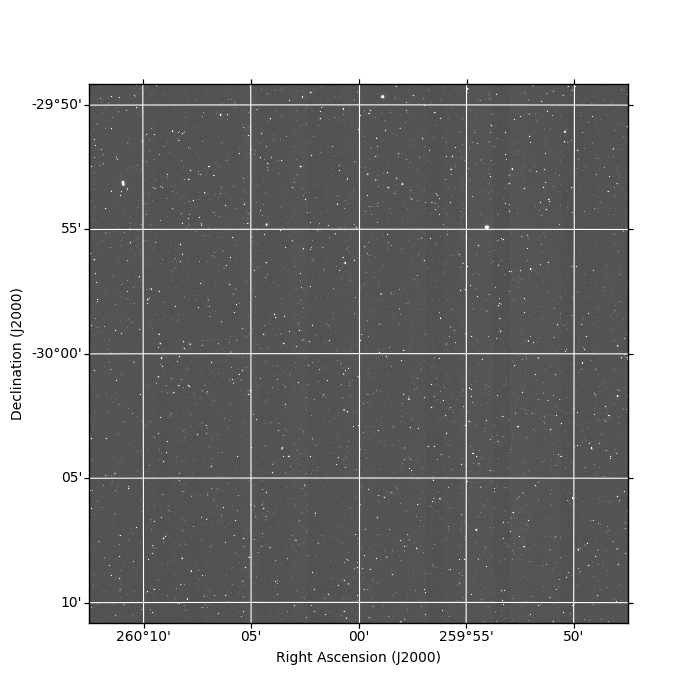

In [18]:
image,header = fits.getdata(fits_filename,header=True)

wcs = WCS(header)
plt.figure(figsize=(7,7))

plt.subplot(projection=wcs)
plt.imshow(image,interpolation='none',cmap='gray',vmin=vmin,vmax=vmax,origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (J2000)')
plt.ylabel('Declination (J2000)')